# Python ML Linear Regression Lesson 72 4_28

In [ ]:
# using scikitlearn (sklearn) to create fit models

In [2]:
import numpy as np
from numpy import linalg
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
print(boston.DESCR) #Label or target is the median house price (MEDV), and you have a lot of features or attributes

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

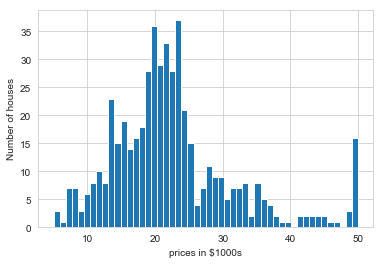

In [8]:
plt.hist(boston.target,bins=50)   ##the dataset has an attribute/prebuilt called target...not all have them
plt.xlabel('prices in $1000s')
plt.ylabel('Number of houses')


# you want to pick one feature/attribute Vs. the target/Lable, which is 'MEDV'

[]

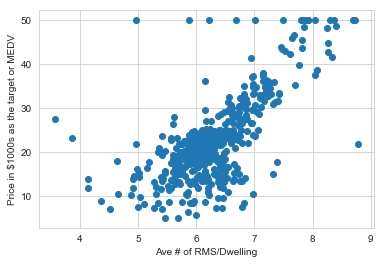

In [9]:
# we will first pick 'RM: average number of rooms per dwelling' as the first feature against 'MEDV'.
# RM is 6th attirbute or [5]  => [<rows:>, <columns>] so [:,5] => this for scatter(x)
# for scatter(y)=> it is boston.target or the label so we have both the scatter(x,y)

plt.scatter(boston.data[:,5],boston.target)
plt.ylabel("Price in $1000s as the target or MEDV")
plt.xlabel("Ave # of RMS/Dwelling")
plt.plot()

# Now we will turn this data into DataFrame using Pandas (tyically all ML are done in numpy but...)

In [10]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


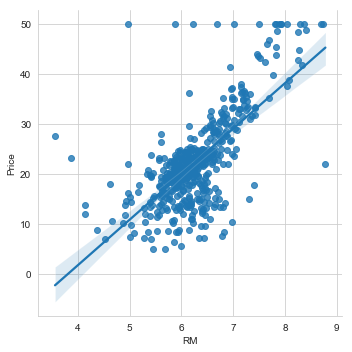

In [11]:
sns.lmplot('RM','Price',data = boston_df)    #lmplot not only gives you scatter plot but also liniar fit() line

# Lesson 73: Least Squares Method 

In [11]:
# The question is:  how do you find the best fit() line??  this sns.lmplot() did this automatically but...
# What is the math behind it? => sum of square of each line to the point is minimal is when you have the fit.
# Scikitlearn can create the Univariate Linear Regression (single variable linear regression)

In [12]:
# Step1: Assigning X&Y:  the X and Y:  X being the feature and Y being the Target
print(boston_df['RM'])


#X= boston_df['RM']　　#This is in Series and need to be convereted to the np.array[] for ML to work.
#print(X)



0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


In [13]:
A = np.vstack(boston_df.RM)  #this makes the X two dimensional: 
print("This is A: ")
print(A)
'''
The vstack() function is used to stack arrays in sequence vertically (row wise).
This is equivalent to concatenation along the first axis after 
1-D arrays of shape (N,) have been reshaped to (1,N).
This function makes most sense for arrays with up to 3 dimensions. 
For instance, for pixel-data with a height (first axis), width (second axis), and r/g/b channels (third axis). T
'''
#print(X)
Y = boston_df.Price 
#numpy expects two dimensional array Now Y = mX+b or a line can be written in Matricies.
#Y = np.array(Y)
print("This is Y")
print(Y)
'''
 Y = mX+b => Y = Ap,s.t., A = [X,1] and p = [m,b].  and since X is a np.array consisting of small x's 
 it needs to be looped through for all values.
'''
# Now creating an array of [X,1] 


A = np.array( [[value,1] for value in A]  )   # This is now in A form of 'Ap'
A = A.astype(np.float64)    #the array has to be float type.
# URL: https://www.reddit.com/r/learnpython/comments/d43f5t/no_loop_matching_the_specified_signature_and/
print("THis is new A:")
print(A)
# Now we need p which requires m and b. 
#m,b = np.linalg.lstsq(X,Y,rcond=None)[0]
m,b = np.linalg.lstsq(A,Y,rcond=None)[0]
#using linear algebra least square method() or lstsq() to create the m and b values
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq
print(m)
print(b)  #14:35



This is A: 
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229

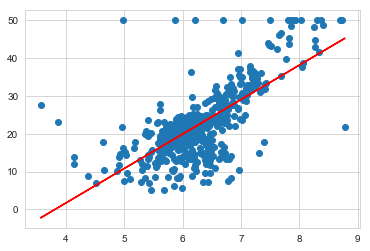

In [14]:
plt.plot(boston_df.RM,boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, m*x+b, 'r', label = "Best Fit Line")

# Lesson 74 Error in the fitted line.

# remember sum of dsquare value

# now root mean_squared_Error

In [16]:
results = np.linalg.lstsq(x,Y)
error_total = result[1]   #the error is stored in [1] based on the documentation.
RMSE = np.sqrt(error_total/len(x))
print(f'root mean squared error was:{RSME.ef}')   #3:37

LinAlgError: 1-dimensional array given. Array must be two-dimensional